In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import date, time, datetime, timedelta
import matplotlib.dates as matdates
import warnings

# Change filename as appropriate
filename = "Hypochilus Monitor14 Edited"
df = pd.read_csv(filename + ".txt", index_col = 0, header = None, delimiter="\t")
#df['Date-Time'] = pd.to_datetime(df.index, utc=True)

#df.set_index('Date-Time', inplace=True)

#display(df)

# This function creates the column labels into a list 

def create_column_labels(date_time_label, light_label, spider_count):
    # Create column labels
    column_names = []
    column_names.append(date_time_label)
    column_names.append(light_label)
    
    # Create spider labels 
    for x in range(1, spider_count + 1):
        column_names.append('Spider ' + str(x))
        
    return column_names

def insert_row(idx, df, df_insert):
    dfA = df.iloc[:idx, ]
    dfB = df.iloc[idx:, ]
    df = pd.concat([dfA, df_insert, dfB], ignore_index = True)
    return df

def generate_time_series(previous_datetime, count):
    # result = [('2022-10-21 13:00', NaN, NaN, ....),
    #           ('2022-10-21 13:01', NaN, NaN, ....),
    #           ...]
    result = []
    for i in range(count):
        previous_datetime = previous_datetime + timedelta(seconds = 60)
        result.append(
            (previous_datetime.strftime("%Y-%m-%d %H:%M:%S"), np.nan,
                                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                                np.nan, np.nan)
        )
    return result
    
def autoFillDataFrame(df):
    index = 0
    #current_datetime = datetime.strptime(df["Date-Time"][0], "%Y-%m-%d %H:%M:%S")
    current_datetime = df["Date-Time"][0]
    previous_datetime = datetime.combine(current_datetime, time.min) - timedelta(seconds = 60)
    while index < len(df.index):
        #current_datetime = datetime.strptime(df["Date-Time"][index], "%Y-%m-%d %H:%M:%S")
        current_datetime = df["Date-Time"][index]
        time_diff = int((current_datetime - previous_datetime).total_seconds())
        if time_diff > 60:
            count = int((time_diff - 60) / 60)
            df = insert_row(index, df, pd.DataFrame(
                generate_time_series(previous_datetime, count),
                columns = df.columns.values))
            index = index + count
        previous_datetime = current_datetime
        index = index + 1
    if not (current_datetime.hour == 23 and current_datetime.minute == 59 ):
        count = (23 - current_datetime.hour) * 60 + (59 - current_datetime.minute)
        df = insert_row(index, df, pd.DataFrame(
                generate_time_series(previous_datetime, count),
                columns = df.columns.values))
    return df

# This function creates a new .csv file with columns labeled Light and Spider name and Date-Time as
# the index

def txt_cleaning_to_csv(df):
    # Change spider count, your light column index number, and date-time label as you see fit
    number_of_spiders = 32
    light_column = 9
    date_time_label = 'Date-Time'
    column_names = create_column_labels(date_time_label, 'Light', number_of_spiders)

    # Keep the last number of spiders columns, the light column, and the first 2 columns, the rest will be removed
    last_df = df.iloc[:, -number_of_spiders:]
    first_df = df.iloc[:, :2]
    light_df = df.iloc[:, light_column - 1]
    date_time_df = first_df[1].astype(str) + ' ' + first_df[2].astype(str)

    # Concatenate the first and last sections of the dataframe
    tempdf = pd.concat([date_time_df, light_df, last_df], axis = 1)

    # Save dataframe as .csv file and set Date and Time columns into datetime format
    
    tempdf.to_csv("Hypochilus Monitor 14 Temp.csv", header = column_names, index = False)
    tempdf = pd.read_csv("Hypochilus Monitor 14 Temp.csv", parse_dates = [date_time_label])
    newdf = autoFillDataFrame(tempdf)
    display(newdf)
    newdf.to_csv("Hypochilus Monitor 14.csv", float_format="%d")
    
    #newdf.set_index(date_time_label, inplace = True)
    #newdf.index = pd.to_datetime(newdf.index)
    
    return newdf
    
df = txt_cleaning_to_csv(df)

,Date-Time,Light,Spider 1,Spider 2,Spider 3,Spider 4,Spider 5,Spider 6,Spider 7,Spider 8,...,Spider 23,Spider 24,Spider 25,Spider 26,Spider 27,Spider 28,Spider 29,Spider 30,Spider 31,Spider 32
0,2022-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-12 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-12 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-12 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-10-12 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40315,2022-11-08 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40316,2022-11-08 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40317,2022-11-08 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40318,2022-11-08 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
dfm = df.copy()
dfm = dfm.replace(0, np.nan)
meandf = (dfm.mean())
absmean = meandf.mean()
sd = np.std(meandf)
lim = absmean + (sd * 3)
print(lim)

21.813043499196283


/var/folders/jt/ss6zd2nx0bv4h_3q_d2qtldm0000gn/T/ipykernel_49837/3478620627.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = (dfm.mean())


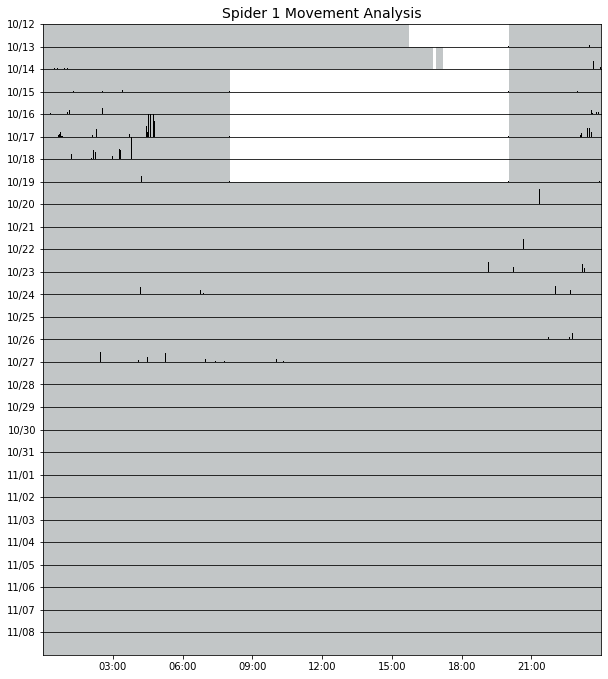

In [9]:
# Read through csv file and create arrays for date, light, and movement that hold info
# If NaN, then replace with value with 0 to create raster plots

def read_csvfile(filename, nth):
    result_date = []
    result_light = []
    result_movement = []
    current_datetime = datetime.today()
    previous_datetime = current_datetime
    prev_date = ""
    date_index = 1
    light_index = 2
    with open(filename) as f:
        current_light_row = []
        current_movement_row = []
        index = 0
        for line in f:
            if index == 0:
                col_index_max = len(line.split(","))
            else:
                cols = line.strip().split(",")
                current_datetime = datetime.strptime(cols[date_index], "%Y-%m-%d %H:%M:%S")
                if prev_date == "" or prev_date == cols[date_index][0:10]:
                    current_light_row.append(int(cols[light_index] or 0))
                    current_movement_row.append(int(cols[nth + 2] or 0))
                else:
                    result_date.append(datetime.strftime(previous_datetime, "%m/%d"))
                    result_light.append(current_light_row)
                    result_movement.append(current_movement_row)
                    current_light_row = [int(cols[light_index] or 0)]
                    current_movement_row = [int(cols[nth + 2] or 0)]
                prev_date = cols[date_index][0:10]
                previous_datetime = current_datetime
            index += 1
        result_date.append(datetime.strftime(previous_datetime, "%m/%d"))
        result_light.append(current_light_row)
        result_movement.append(current_movement_row)
    return (result_date, result_light, result_movement)

# For each day, generate bar chart for spider nth

def draw_barchart(array_date, array_light, array_movement, nth):
    date_label = array_date
    number_of_days = len(array_movement)
    #print("Num days:", number_of_days)
    fig, axes = plt.subplots(nrows=number_of_days)
    fig.set_size_inches((10, 12))
    
    # Find the maximum movement in all 9 days

    max_movement = 0
    for temp in array_movement:
        t = max(temp)
        if t > max_movement:
            max_movement = t
    #print("max movement:",max_movement)

    # 1440: number of minutes in a day
    
    x = list(range(0,1440))
    axes[0].set_title('Spider ' + str(nth) + ' Movement Analysis', fontsize=14)
    
    #setting up axes

    for day_index, day_movement in enumerate(array_movement):
        axes[day_index].set_facecolor('#C2c6c7')
        axes[day_index].set_ylim(0, max_movement / 2)
        axes[day_index].set_xlim(-0.5, len(day_movement) - 0.5)
        
        # apply light on background color setting
        #axes[day_index].axvspan(xmin=600, xmax=650, facecolor="white")
        
        if 1 in array_light[day_index]:
            start_index = -1
            end_index = -1
            for minute_index, light in enumerate(array_light[day_index]):
                if light == 1 and start_index == end_index:
                    start_index = minute_index
                elif light == 0 and start_index != end_index:
                    end_index = minute_index
                    #print("There is a light section ", start_index, end_index)
                    axes[day_index].axvspan(xmin = start_index, xmax = end_index, facecolor="white")
                    start_index = end_index
            if start_index != end_index:
                axes[day_index].axvspan(xmin = start_index, xmax = end_index, facecolor="white")

        # draw barchart
        
        axes[day_index].bar(x, day_movement, color="black")
        axes[day_index].get_xaxis().set_visible(False) # Hide all X ticks for now
        axes[day_index].set_yticks([max_movement / 2], labels=[date_label[day_index]])
    axes[number_of_days-1].get_xaxis().set_visible(True)
    axes[number_of_days-1].set_xticks([180,360,540,720,900,1080,1260],labels=["03:00","06:00","09:00","12:00","15:00","18:00","21:00"]);
    plt.subplots_adjust(bottom=0.15, hspace=0)
    plt.show()

csvfilename = 'Hypochilus Monitor 14.csv'
nthSpider = 1

(array_date, array_light, array_movement) = read_csvfile(csvfilename, nthSpider)
draw_barchart(array_date, array_light, array_movement, nthSpider)

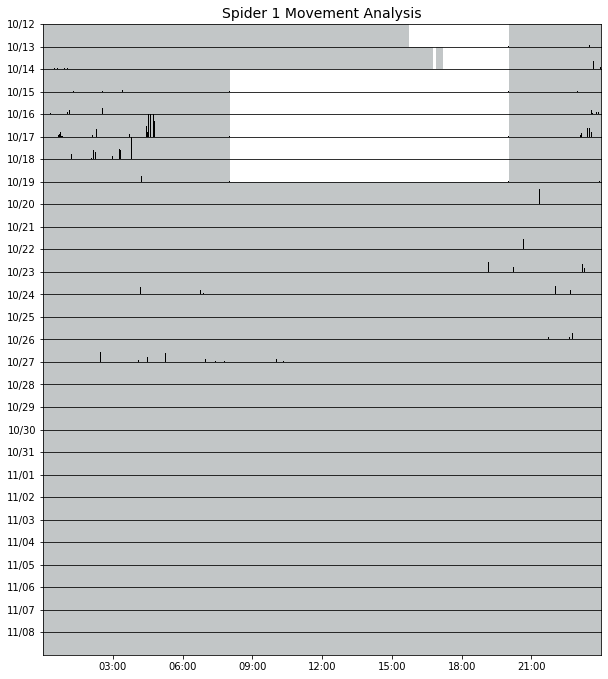

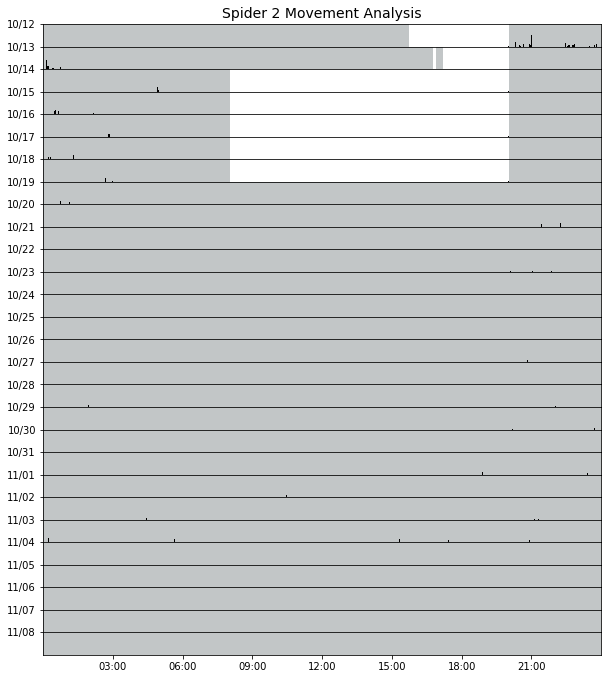

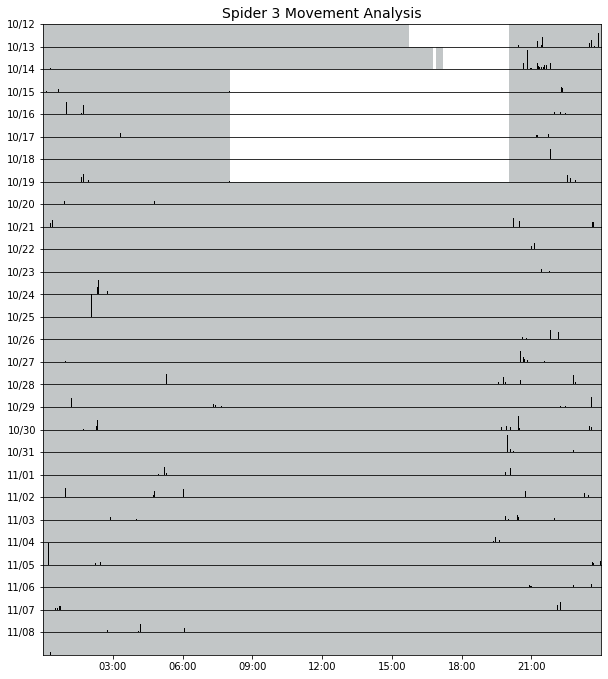

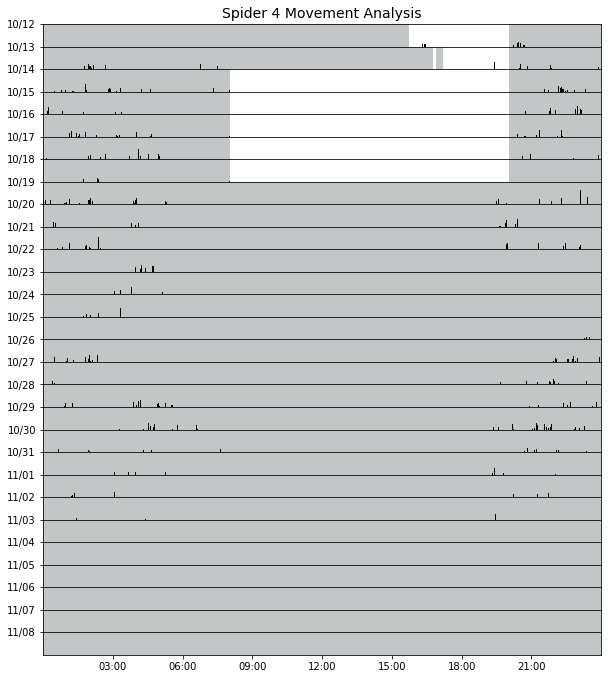

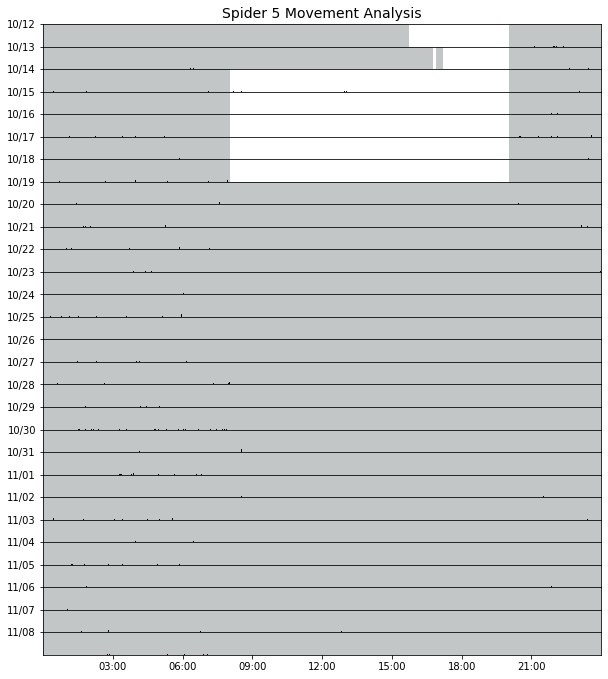

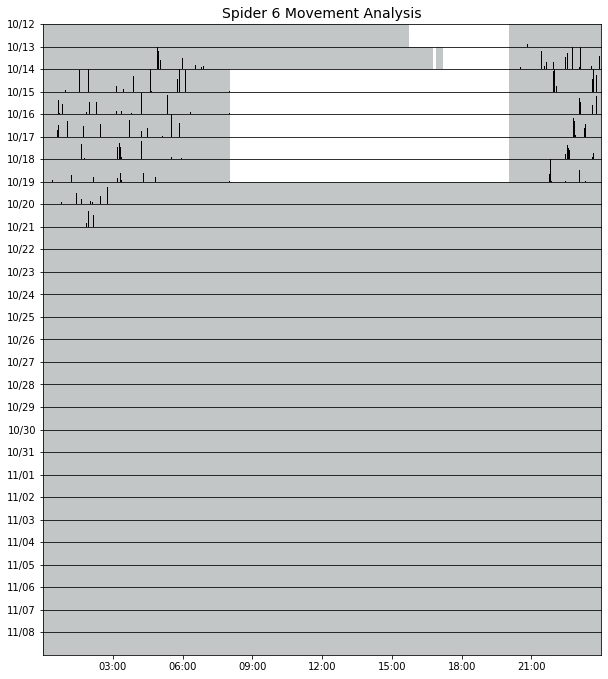

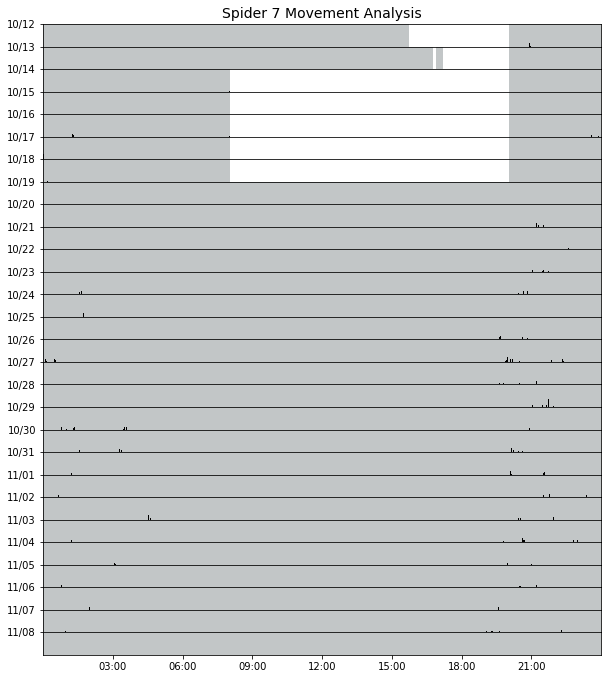

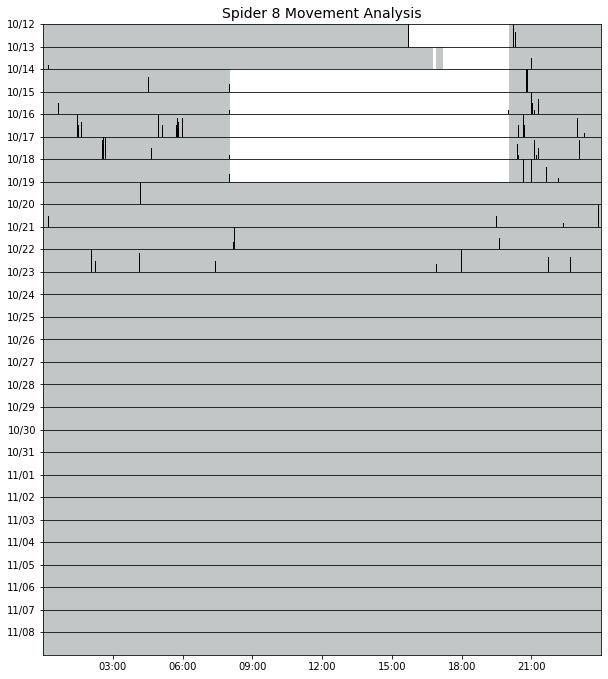

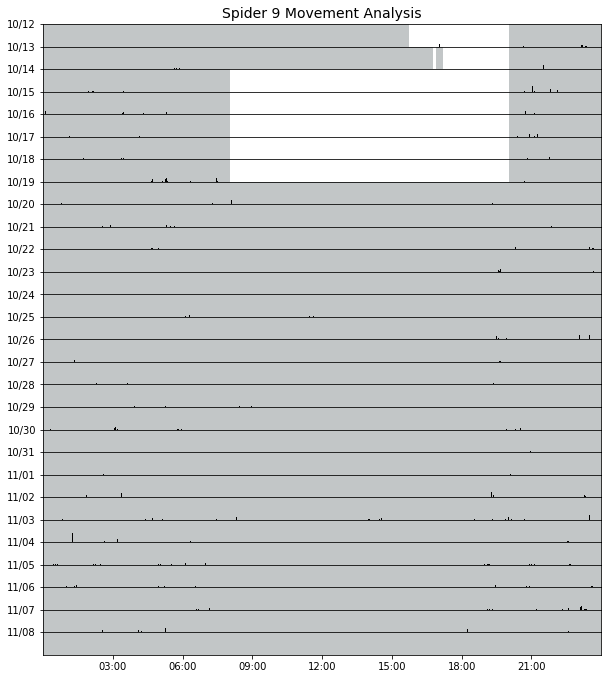

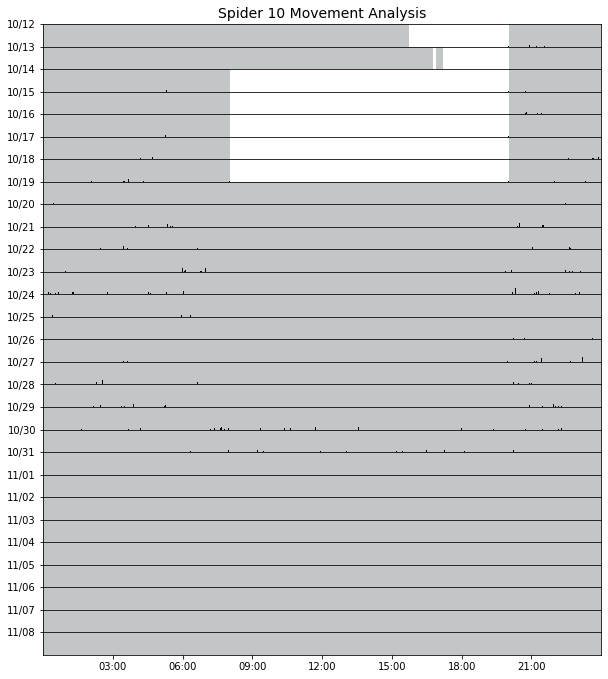

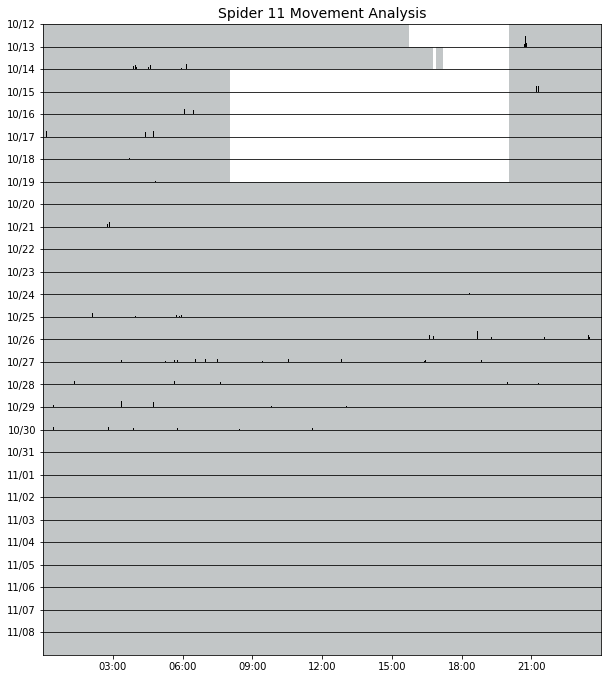

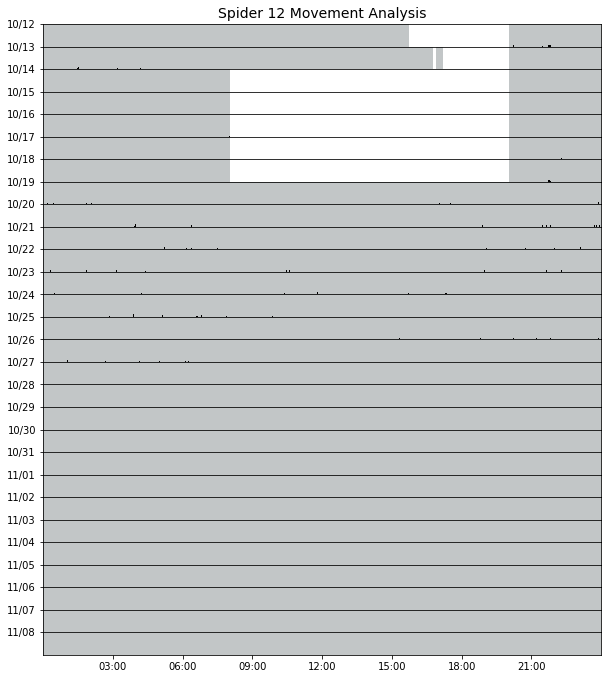

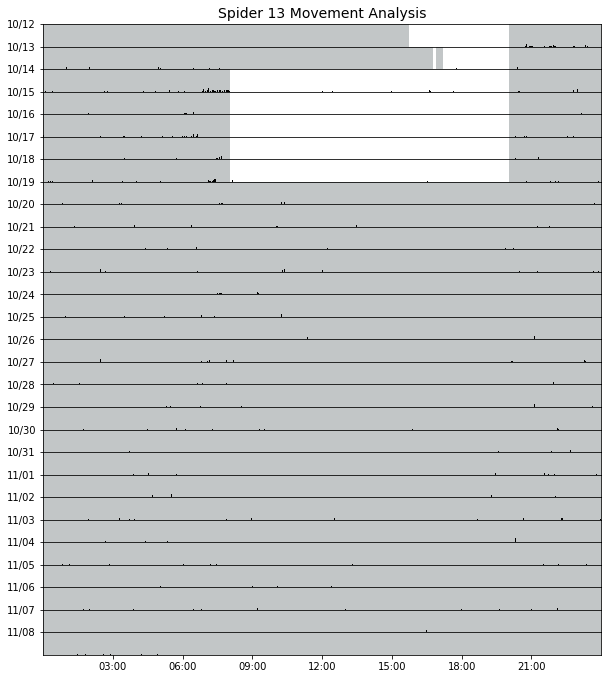

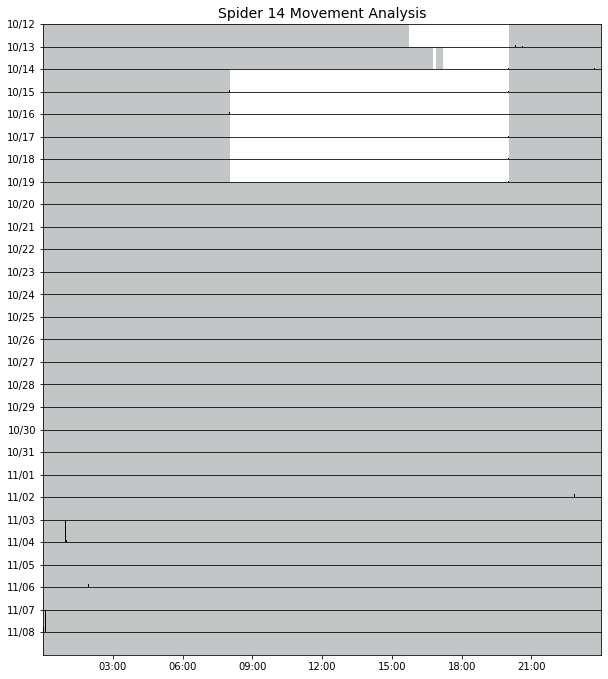

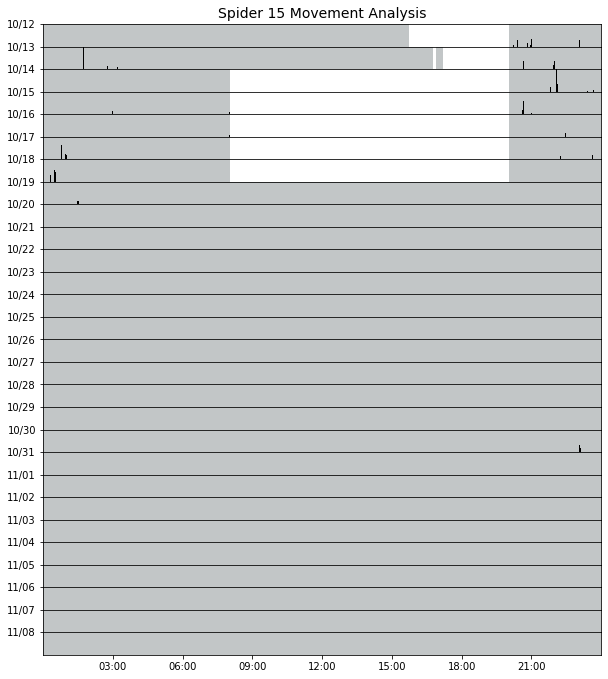

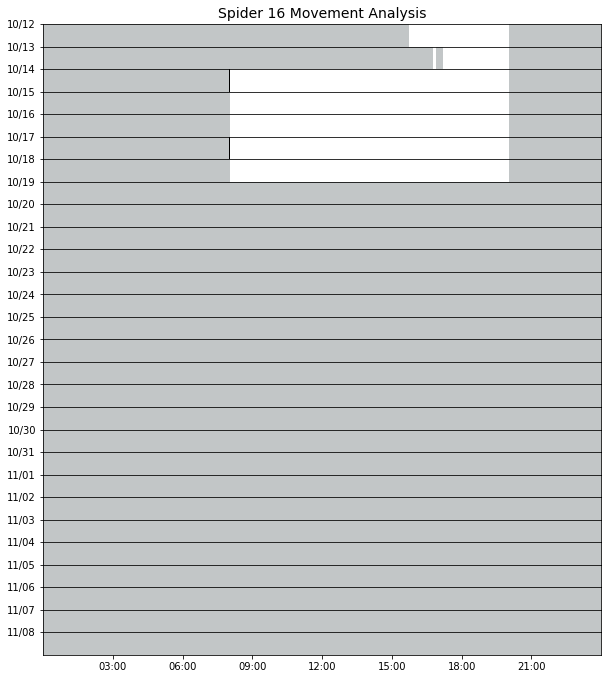

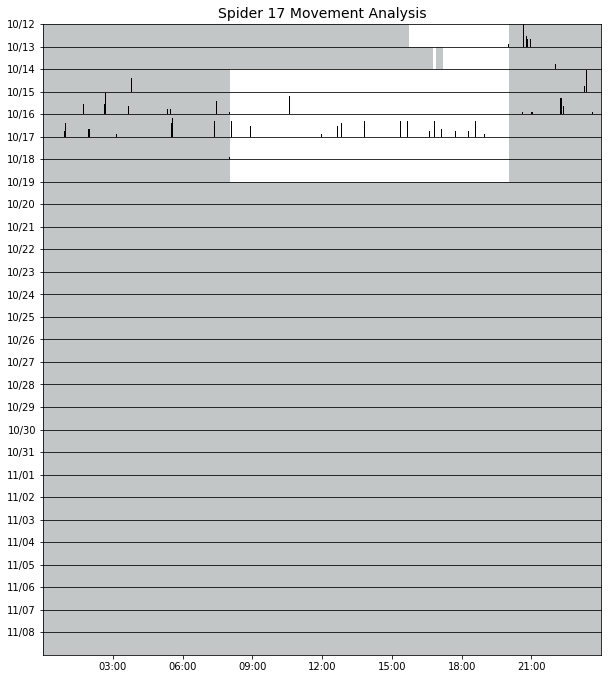

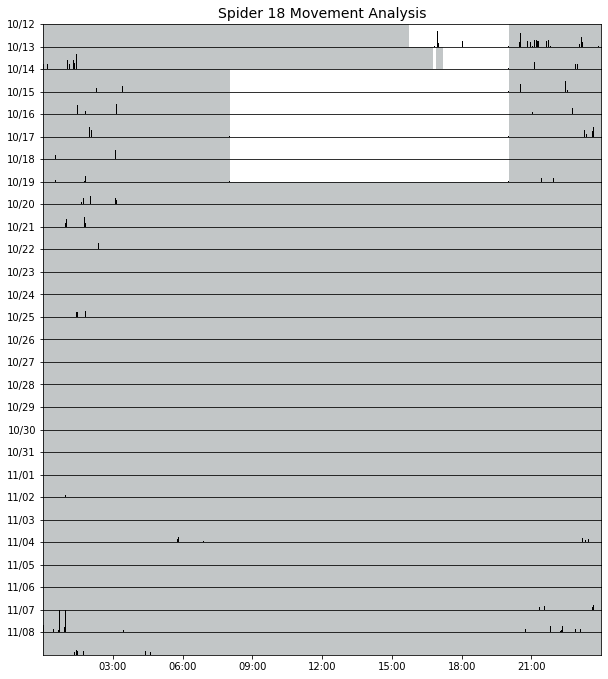

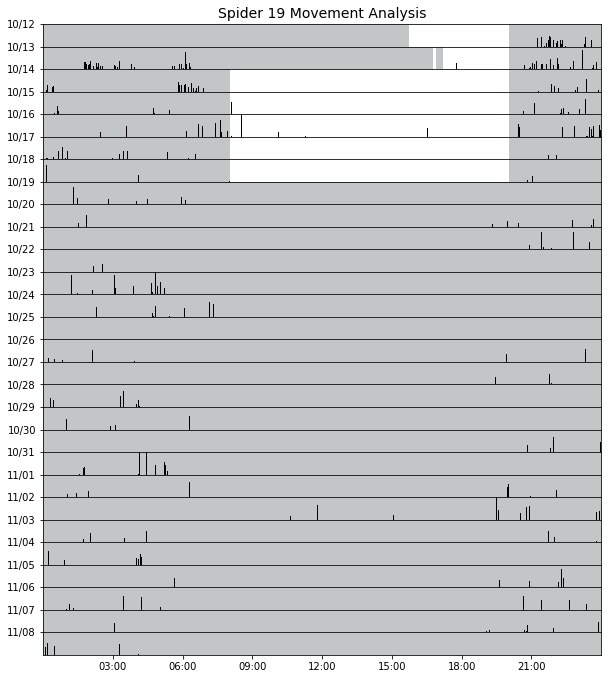

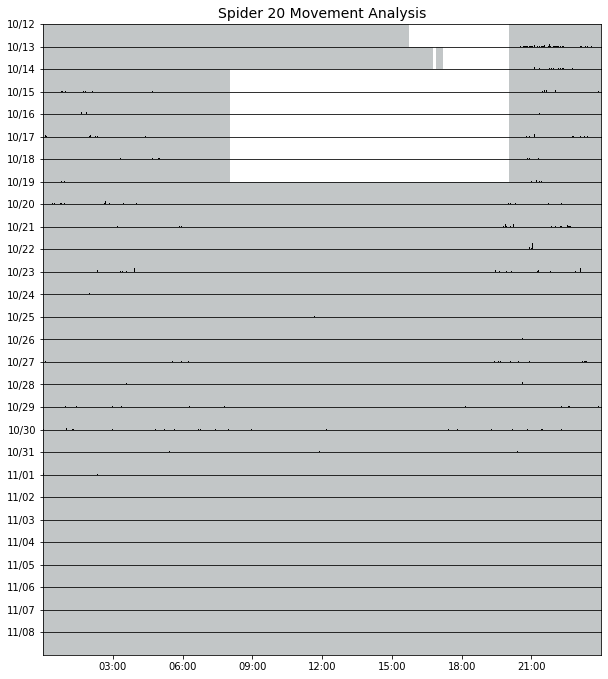

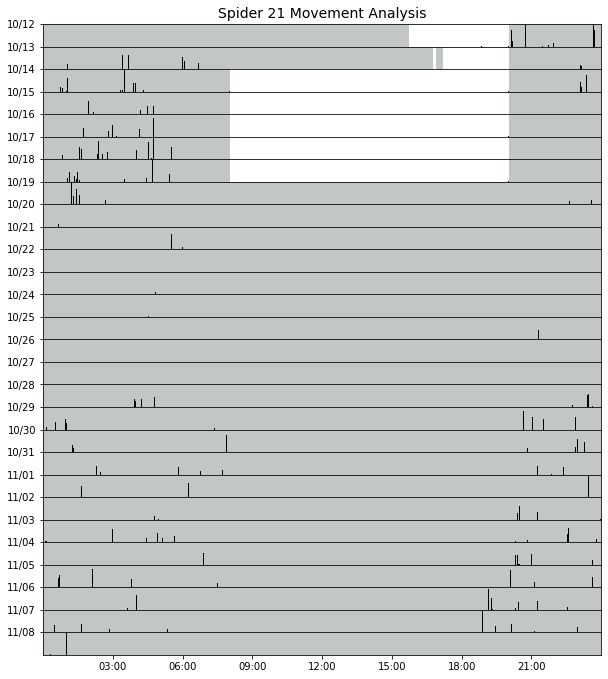

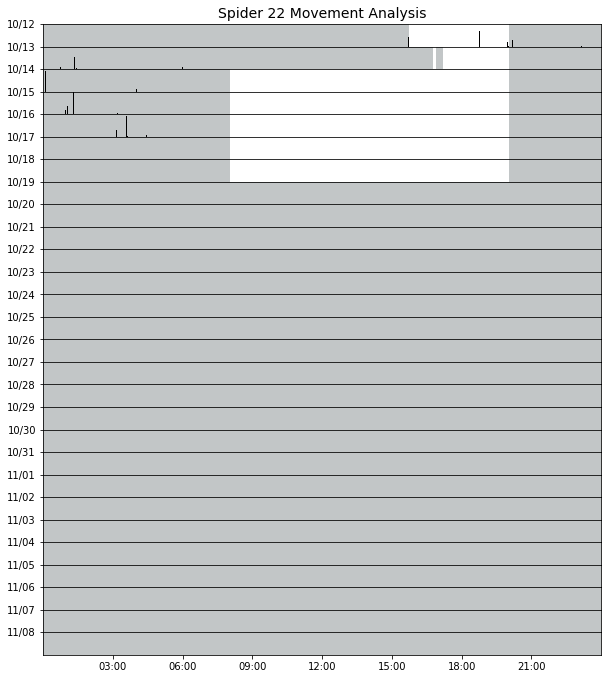

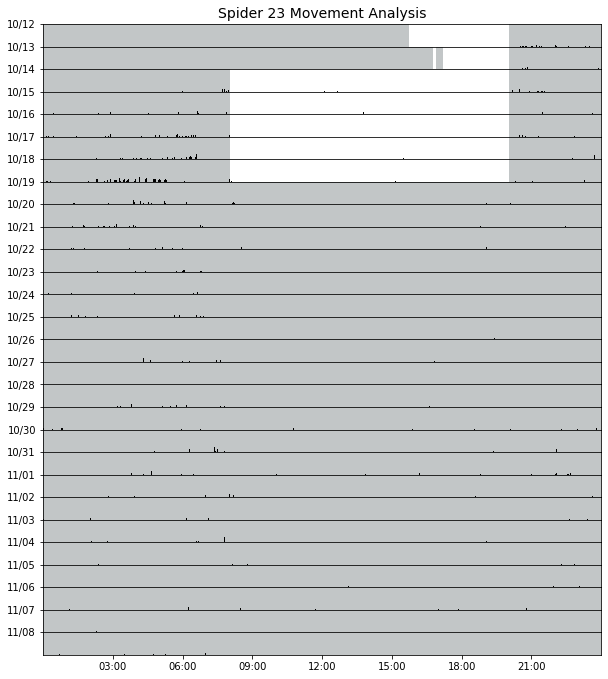

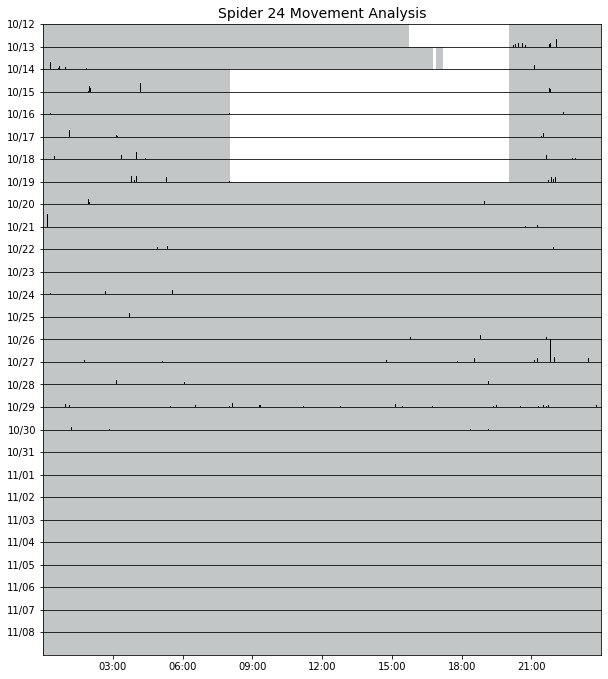

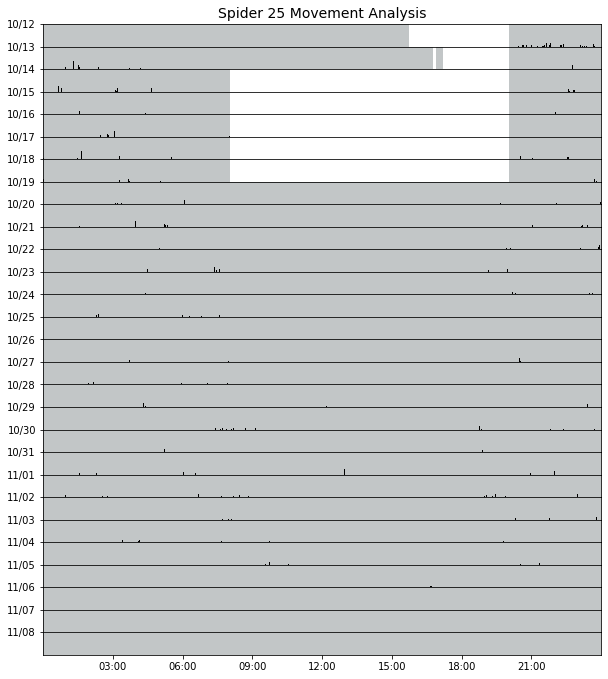

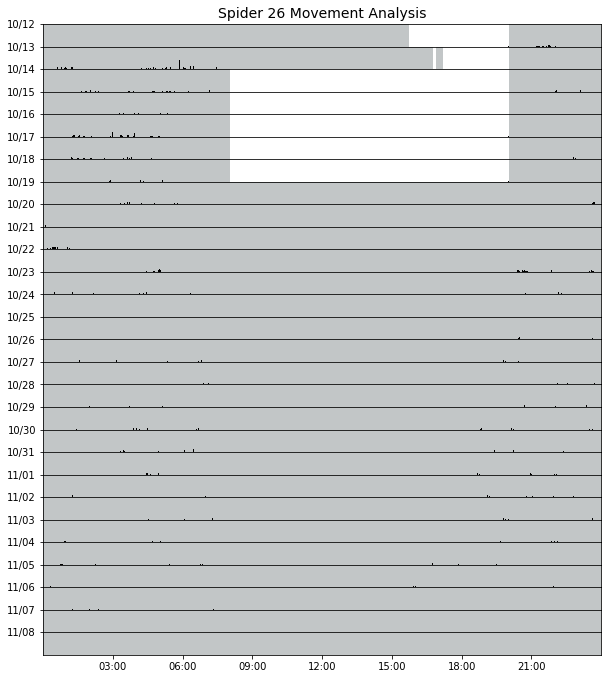

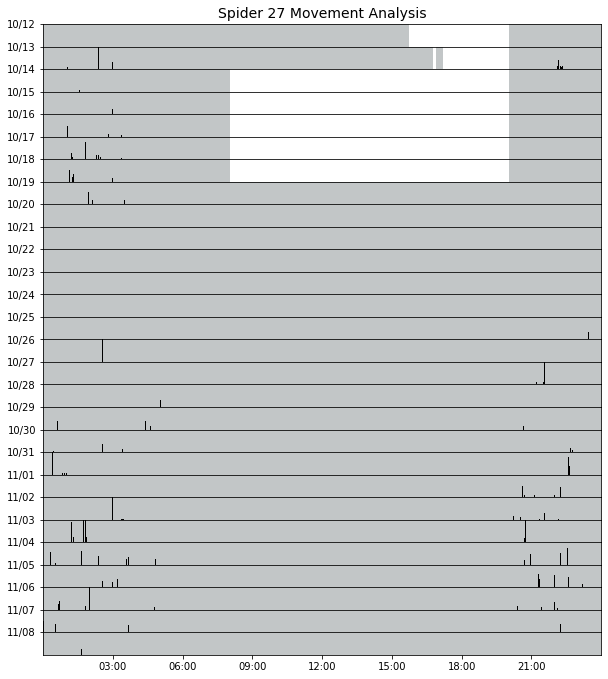

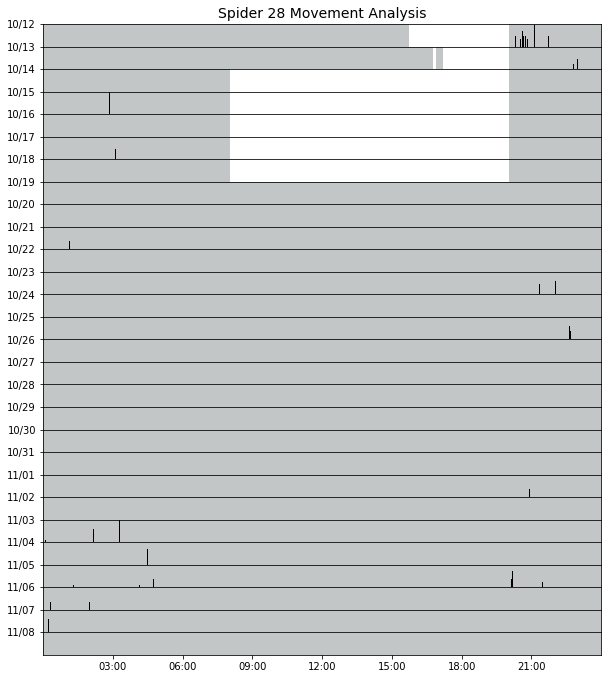

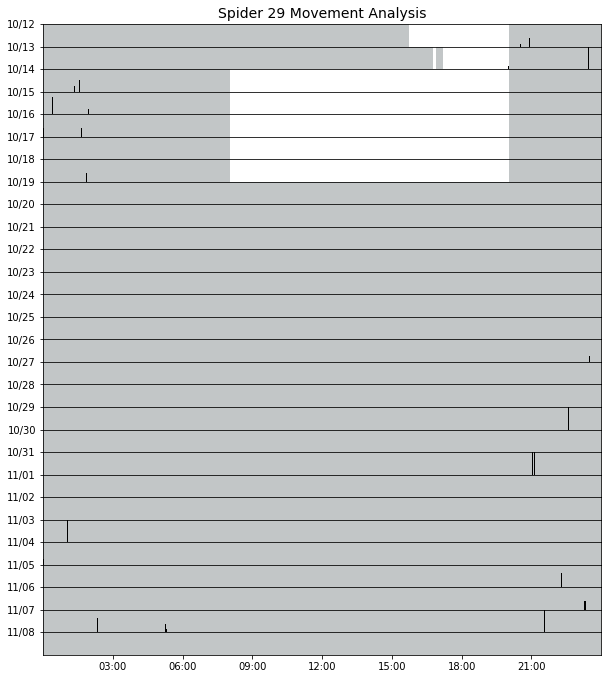

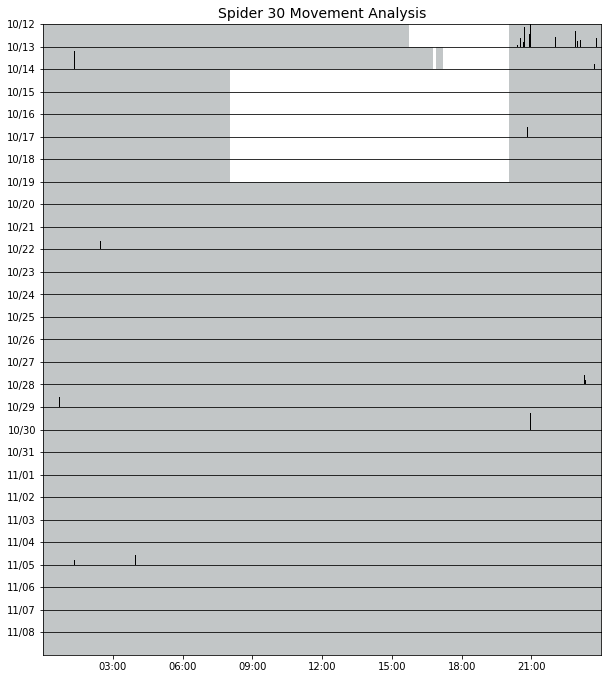

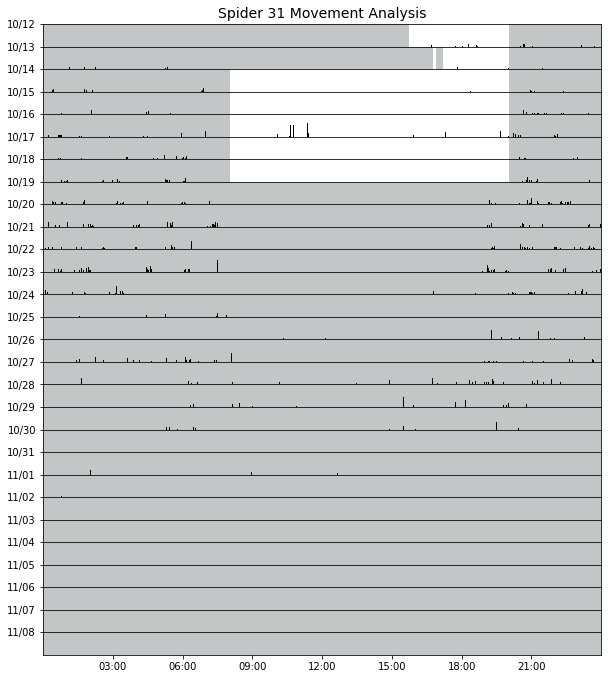

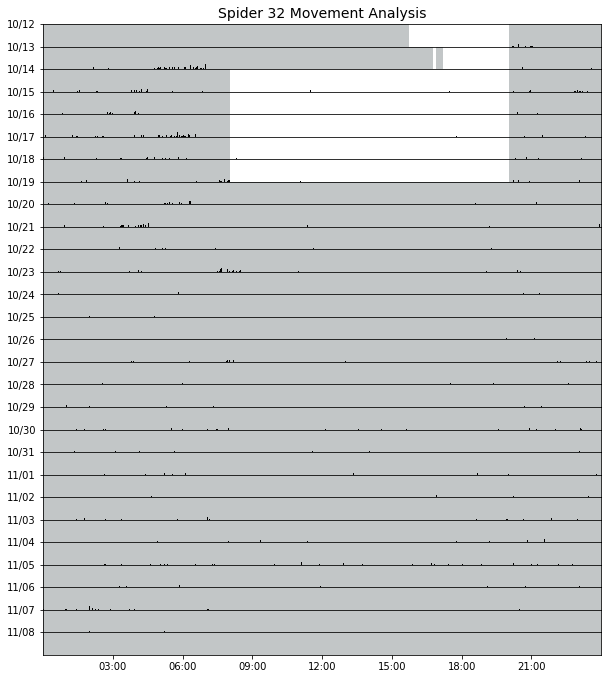

In [10]:
# Loop through spiders and create raster plots

csvfilename = 'Hypochilus Monitor 14.csv'

for i in range(1, 33):
    (array_date, array_light, array_movement) = read_csvfile(csvfilename, i)
    draw_barchart(array_date, array_light, array_movement, i)
    i = i + 1